In [57]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [70]:
img=cv2.imread('./test-images/000005.jpg')
img.shape

(705, 486, 3)

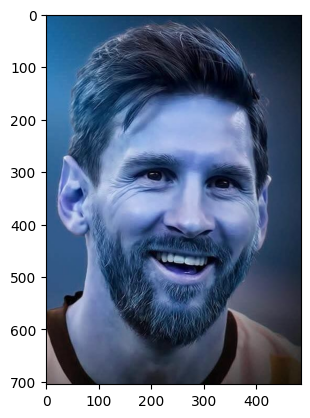

In [71]:
plt.imshow(img)

In [72]:
#converting the colorful image to the black and white
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(705, 486)

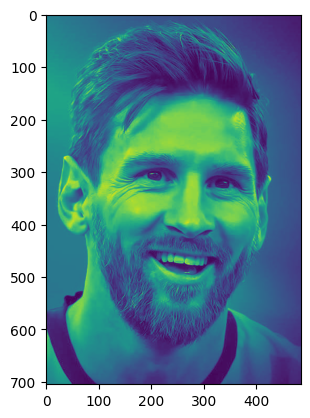

In [73]:
plt.imshow(gray)

In [74]:
gray

array([[107, 107, 106, ...,  16,  16,  16],
       [107, 106, 106, ...,  16,  16,  16],
       [106, 106, 105, ...,  17,  17,  17],
       ...,
       [104, 104, 105, ...,  23,  23,  23],
       [104, 104, 104, ...,  23,  23,  23],
       [102, 102, 102, ...,  23,  23,  23]], dtype=uint8)

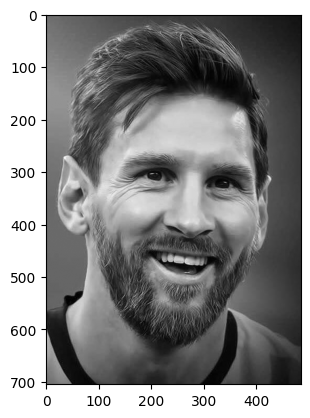

In [75]:
plt.imshow(gray,cmap='gray')

In [76]:
#detecting the face using the opencv face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

faces=face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[ 78, 174, 371, 371]], dtype=int32)

In [77]:
(x,y,w,h)=faces[0]
x,y,w,h

(np.int32(78), np.int32(174), np.int32(371), np.int32(371))

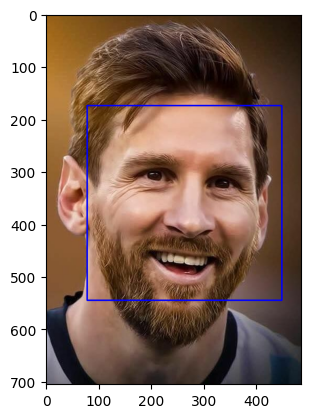

In [78]:
# And you have a face rectangle at (x, y, w, h)
face_img = cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)

# Convert BGR (OpenCV default) to RGB for matplotlib
# img_rgb = cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB)

# Show the image using matplotlib
plt.imshow(img_rgb)

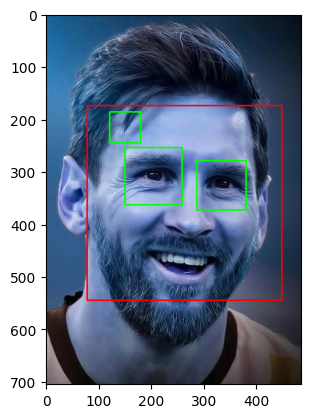

In [79]:
# Close all OpenCV windows (if any are open)
cv2.destroyAllWindows()

# Loop through all detected faces
for (x, y, w, h) in faces:
    # Draw rectangle around the face (blue box)
    face_img = cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
    
    # Get the region of interest in grayscale for eye detection
    roi_gray = gray[y:y + h, x:x + w]
    
    # Get the corresponding region in the color image to draw eye rectangles
    roi_color = face_img[y:y + h, x:x + w]
    
    # Detect eyes within the face region
    eyes = eye_cascade.detectMultiScale(roi_gray)
    
    # Loop through all detected eyes
    for (ex, ey, ew, eh) in eyes:
        # Draw rectangle around each eye (green box)
        cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)

# Create a new figure for plotting
plt.figure()

# Show the final image with rectangles using grayscale colormap
plt.imshow(face_img, cmap='gray')

# Display the plot
plt.show()


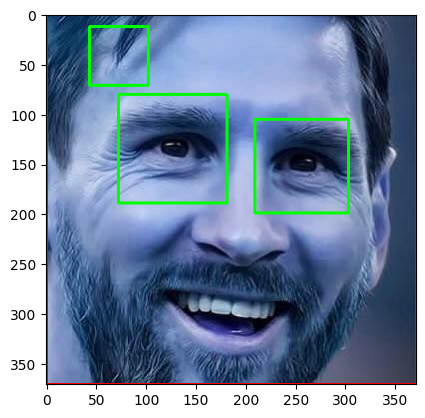

In [80]:
%matplotlib inLine
plt.imshow(roi_color,cmap='gray')

In [87]:
def get_cropped_image_if_2_eyes(image_path):
    # Read the image
    img = cv2.imread(image_path)
    
    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    # Loop through the detected faces
    for (x, y, w, h) in faces:
        # Crop the region of interest (ROI) in grayscale for eye detection
        roi_gray = gray[y:y + h, x:x + w]
        
        # Crop the region of interest (ROI) in the original image for eye detection
        roi_color = img[y:y + h, x:x + w]
        
        # Detect eyes within the cropped face region
        eyes = eye_cascade.detectMultiScale(roi_gray)
        
        # If at least 2 eyes are detected, return the cropped face
        if len(eyes) >= 2:
            return roi_color
    
    # If no valid face with 2 eyes is found, return None or handle it as needed
    return None

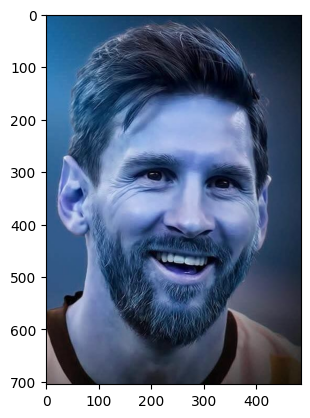

In [88]:
original_image=cv2.imread('./test-images/000005.jpg')
plt.imshow(original_image)

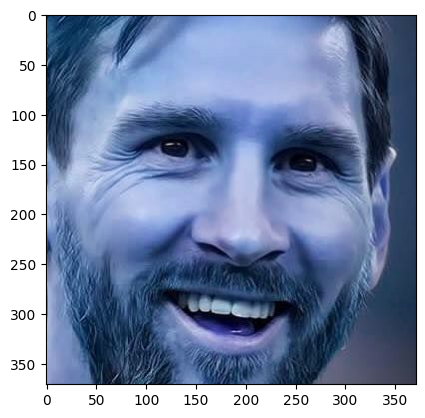

In [89]:
cropped_image=get_cropped_image_if_2_eyes('./test-images/000005.jpg')
plt.imshow(cropped_image)

In [ ]:
#lets try the face not clearly image to crop